## Question 5

Consider the full $2^5$ factorial design Question 4 above. Suppose that this experiment had been run in two blocks with $ABCDE$ confounded with the blocks. Set up the blocked design and perform the analysis. Compare your results with the results obtained for the completely randomized design in Question 4.

In [1]:
# Load in the data from the previous question
A <- rep(c(-1, 1), 16)
B <- rep(c(-1, -1, 1, 1), 8)
C <- rep(c(-1, -1, -1, -1, 1, 1, 1, 1), 4)
D <- rep(c(-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1), 2)
E <- c(
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
)
y <- c(
    08.11, 05.56, 05.77, 05.82, 09.17, 07.80, 03.23, 05.69,
    08.82, 14.23, 09.20, 08.94, 08.68, 11.49, 06.25, 09.12,
    07.93, 05.00, 07.47, 12.00, 09.86, 03.65, 06.40, 11.61,
    12.43, 17.55, 08.87, 25.38, 13.06, 18.85, 11.78, 26.05
)
data <- data.frame(A, B, C, D, E, y)
t(data)

A,-1.00,1.00,-1.00,1.00,-1.00,1.0,-1.00,1.00,-1.00,1.00,...,-1.0,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00
B,-1.00,-1.00,1.00,1.00,-1.00,-1.0,1.00,1.00,-1.00,-1.00,...,1.0,1.00,-1.00,-1.00,1.00,1.00,-1.00,-1.00,1.00,1.00
C,-1.00,-1.00,-1.00,-1.00,1.00,1.0,1.00,1.00,-1.00,-1.00,...,1.0,1.00,-1.00,-1.00,-1.00,-1.00,1.00,1.00,1.00,1.00
D,-1.00,-1.00,-1.00,-1.00,-1.00,-1.0,-1.00,-1.00,1.00,1.00,...,-1.0,-1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
E,-1.00,-1.00,-1.00,-1.00,-1.00,-1.0,-1.00,-1.00,-1.00,-1.00,...,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
y,8.11,5.56,5.77,5.82,9.17,7.8,3.23,5.69,8.82,14.23,...,6.4,11.61,12.43,17.55,8.87,25.38,13.06,18.85,11.78,26.05


Now we create a new column with the blocks

Call:
   aov(formula = model)

Terms:
                   Blocks         A         B         C         D         E
Sum of Squares    4.03990  83.56013   0.06038   0.00475 285.78428 153.16875
Deg. of Freedom         1         1         1         1         1         1
                      A:B       A:C       B:C       A:D       B:D       C:D
Sum of Squares   48.93078   0.00008   1.22070  88.87778   0.00578   0.00038
Deg. of Freedom         1         1         1         1         1         1
                      A:E       B:E       C:E       D:E     A:B:C     A:B:D
Sum of Squares   33.76365  52.71078   2.91008  61.79940   2.00500   3.81570
Deg. of Freedom         1         1         1         1         1         1
                    A:C:D     B:C:D     A:B:E     A:C:E     B:C:E     A:D:E
Sum of Squares    0.12878   2.98290  44.95890   2.14763   0.93503  26.01008
Deg. of Freedom         1         1         1         1         1         1
                    B:D:E     C:D:E   A:B:C:D   A:

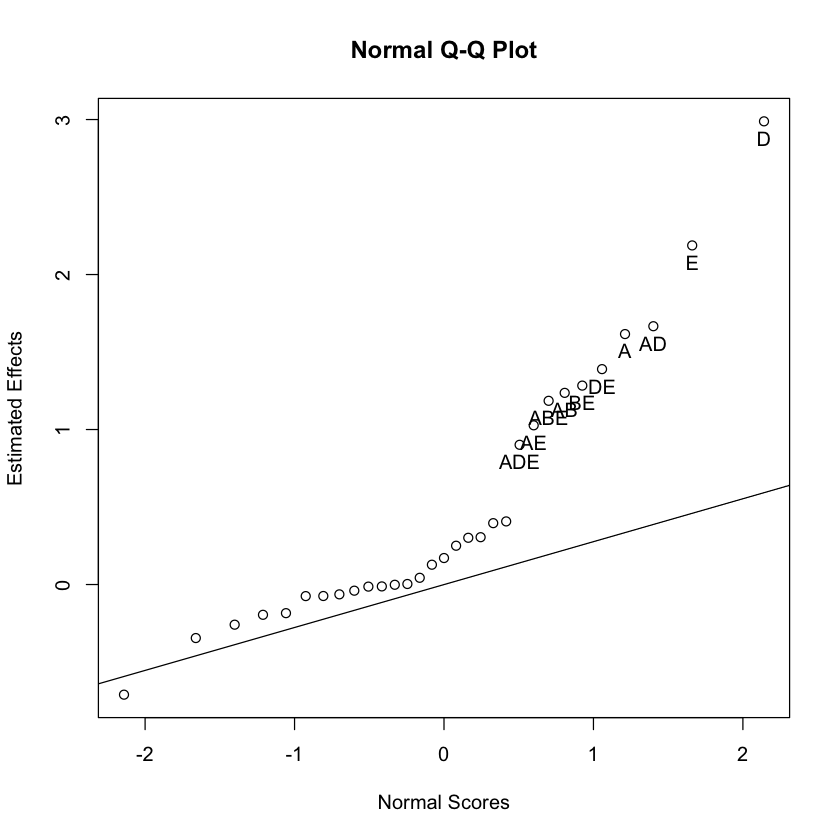

In [2]:
data$Blocks <- as.factor(with(data, A * B * C * D * E))
model <- lm(y ~ Blocks + A*B*C*D*E - A:B:C:D:E, data = data)
# model analysis
library(daewr)
fullnormal(coef(model)[-1], alpha = 0.025)
aov(model)


It is exactly the same as the completely randomized design in question 4. It seems the blocking effects are insignificant.